# SVM, Logistic Regression and Neural Networks


## Exercise 1: Logistic Regression

In this exercise, your goal is to build a multi-class logistic regression classifier that can predict the label of a
given tweet.

## Import Libraries

In [1]:
import nltk
import sklearn
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Data

In [2]:
df = pd.read_csv('training-lr.csv',encoding='ISO-8859-1')
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


## Split the data into train (60%), validation (20%) and test (20%)

In [3]:
## Split the data into train (60%), validation (20%) and test (20%)x = df['text']
#splitting training set and testing set to 80%, 20%

###### YOUR CODE STARTS HERE ##### (~ approx 1 line of code)
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['airline_sentiment'], test_size = 0.2)
###### YOUR CODE ENDS HERE #####

# training set is 80% now, we split the training and validation where each should be 60% and 20% respectively
# i.e. validation data is 1/4 the training data which is equivalent to 25% of it

###### YOUR CODE STARTS HERE ##### (~ approx 1 line of code)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)
###### YOUR CODE ENDS HERE #####


print (f"Number of training examples: {len(X_train)}")
print (f"Number of testing examples: {len(X_test)}")
print (f"Number of validating examples: {len(X_val)}")

Number of training examples: 8784
Number of testing examples: 2928
Number of validating examples: 2928


**Expected Output for X_train, X_test and X_val**:
<table style="width:15%">
  <tr>
    <td>**X_train**</td>
    <td> 8784 </td>
  </tr>
  
  <tr>
    <td>**X_test**</td>
    <td> 2928 </td>
  </tr>
  
  <tr>
    <td>**X_val**</td>
    <td> 2928 </td>
  </tr>
  
</table>


In [4]:
assert len(X_train) == 8784
assert len(X_test) == 2928
assert len(X_val) == 2928

print("\nYour values are correct! Continue with the rest of your code.")


Your values are correct! Continue with the rest of your code.


We use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from scikit-learn is employed to encode categorical labels into a numerical format.

- The encoder is first instantiated, and then it is fitted to the training set labels (`Y_train`) using the fit_transform method, converting them into numerical representations.
- The same encoding transformation is then applied to the validation set labels (`Y_val`) and the test set labels (`Y_test`) using the transform method, ensuring consistency in encoding across all sets.

In [5]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_val = encoder.transform(Y_val)
Y_test = encoder.transform(Y_test)

## Process Data

 Process your data by removing stop words and performing stemming.

In [6]:
def preprocess(X):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    X_preprocessed = []
    for sentence in X:
        preprocessed_sentence = ''
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            if not word in stop_words:
                preprocessed_sentence += ps.stem(word) + ' '

        X_preprocessed.append(preprocessed_sentence)

    return X_preprocessed

### YOUR CODE STARTS HERE ### (~ approx 3 lines)
X_train_preprocessed = preprocess(X_train)
X_val_preprocessed   = preprocess(X_val)
X_test_preprocessed  = preprocess(X_test)
### YOUR CODE ENDS HERE ### (~ approx 3 lines)

print (f"Number of training examples: {len(X_train_preprocessed)}")
print (f"Number of testing examples: {len(X_test_preprocessed)}")
print (f"Number of validating examples: {len(X_val_preprocessed)}")

Number of training examples: 8784
Number of testing examples: 2928
Number of validating examples: 2928


**Expected Output for X_train_preprocessed, X_test_preprocessed and X_val_preprocessed**:
<table style="width:25%">
  <tr>
    <td>**X_train_preprocessed**</td>
    <td> 8784 </td>
  </tr>
  
  <tr>
    <td>**X_test_preprocessed**</td>
    <td> 2928 </td>
  </tr>
  
  <tr>
    <td>**X_val_preprocessed**</td>
    <td> 2928 </td>
  </tr>
  
</table>


## TF-IDF Weighting


In the below code, you should follow these steps:
1. **Create TF-IDF Vectorizer:**
Initialize a TF-IDF vectorizer, such as `TfidfVectorizer`, to convert text data into a matrix of TF-IDF features.
2. **Fit and Transform Training Data:**
Fit the TF-IDF Vectorizer on the preprocessed training data `X_train_preprocessed` to learn the vocabulary and transform it into a TF-IDF feature matrix.
3. **Transform Test Data**:
Use the pre-fitted TF-IDF Vectorizer to transform the preprocessed testing data `X_test_preprocessed` into a corresponding TF-IDF feature matrix.
4. **Transform Validation Data:**
Similarly, apply the pre-fitted TF-IDF Vectorizer to transform the validation data `X_val_preprocessed` into a TF-IDF feature matrix.


For more info about TFIDF, check the documentation of <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">`Tfidf Vectorizer`</a>

In [7]:
### YOUR CODE STARTS HERE ### (≈ approx 2 lines of code)

# create your TFID vectorize
FreqVectorizer= TfidfVectorizer()
# fit and transform the training data
X_train_freq= FreqVectorizer.fit_transform(X_train_preprocessed)
### YOUR CODE ENDS HERE ###

vocab_size_train = len(FreqVectorizer.vocabulary_)
print(f"Train Vocabulary size: {vocab_size_train}")

### YOUR CODE STARTS HERE ### (≈ approx 2 lines of code)
# transform X_test
X_test_freq= FreqVectorizer.transform(X_test_preprocessed)
# transform X_val
X_val_freq= FreqVectorizer.transform(X_val_preprocessed)
### YOUR CODE ENDS HERE ###

Train Vocabulary size: 9426


## Logistic Regression Model

Train a logistic regression model using the tf-idf weights and use an $L_2$ regularizer. You should set the regularization parameter using the validation set.
<br>
Note: `C` parameter is used for L2 regularization in <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Logistic Regression Model</a>


In [8]:
lbds = [0.001, 0.01, 0.1, 1, 10,  100]

### YOUR CODE STARTS HERE ### (≈ approx 5 lines of code)
for lbd in lbds:
    # Create your logistic regression model here, e.g., LogisticRegression
    reg = LogisticRegression(C=lbd, penalty = 'l2', solver = 'lbfgs', max_iter = 10000)

    # Use the produced features from the previous cell and corresponding labels training set
    reg.fit(X_train_freq, Y_train)

    # predict using the validation features created in the previous cell
    y_pred = reg.predict(X_val_freq)

    # measure the accuracy and f1 using y_pred and val labels
    f1 = f1_score(Y_val, y_pred, average = 'micro')
    accuracy = accuracy_score(Y_val, y_pred)
### YOUR CODE ENDS HERE ###
    print("Lambda {}:\taccuracy: {:.2f}%\tF1-score:{:.2f}%".format(lbd, accuracy*100, f1*100))

Lambda 0.001:	accuracy: 63.56%	F1-score:63.56%
Lambda 0.01:	accuracy: 64.34%	F1-score:64.34%
Lambda 0.1:	accuracy: 71.65%	F1-score:71.65%
Lambda 1:	accuracy: 78.11%	F1-score:78.11%
Lambda 10:	accuracy: 76.64%	F1-score:76.64%
Lambda 100:	accuracy: 73.60%	F1-score:73.60%


<table style="width:50%">
  <tr>
    <th>Lambda</th>
    <th>Accuracy</th>
    <th>F1-score</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>60.96%</td>
    <td>60.96%</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>61.51%</td>
    <td>61.51%</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>68.31%</td>
    <td>68.31%</td>
  </tr>
  <tr>
    <td>1</td>
    <td>77.49%</td>
    <td>77.49%</td>
  </tr>
  <tr>
    <td>10</td>
    <td>77.32%</td>
    <td>77.32%</td>
  </tr>
  <tr>
    <td>100</td>
    <td>74.66%</td>
    <td>74.66%</td>
  </tr>
</table>

Please be aware that while your accuracy and F1 score may not precisely match the provided expected output, they should fall within a range of the expected values, allowing for a deviation of approximately ±5%.

Report the validation accuracy and F-measure of your selected model.

In [10]:
# Train your best model, i.e., the model with the highest accuracy reported before
# Report the model's accuracy and F-measure

### YOUR CODE STARTS HERE ### (≈ 7 lines of code)

# Assign the best regularization parameter identified earlier
best_lbd = 1

# Instantiate the logistic regression model (LogisticRegression) with the best C value
# and train it on the entire training set.
# Use appropriate features tfidf training set and labels (Y_train) here

reg = LogisticRegression(C=best_lbd, penalty='l2', solver='lbfgs', max_iter=10000)
reg.fit(X_train_freq, Y_train)


# Make Predictions and Calculate F-measure:
# Make predictions on the test set and calculate the F-measure.
y_pred = reg.predict(X_test_freq)
test_f1 = f1_score(Y_test, y_pred, average = 'micro')


# Evaluate the Model on the Test Set:
# Test the trained model on the test set and calculate its accuracy.
# Use appropriate features tfidf testing set and labels (Y_test) here
test_accuracy = accuracy_score(Y_test, y_pred)


### YOUR CODE ENDS HERE ###
print("Lambda 1:\taccuracy: {:.2f}%\tF1-score:{:.2f}%".format(test_accuracy*100, test_f1*100))

Lambda 1:	accuracy: 78.83%	F1-score:78.83%


**Expected Output for Your best Lambda, accuracy, F1-score**:
<table style="width:50%">
  <tr>
    <th>Lambda</th>
    <th>Accuracy</th>
    <th>F1-score</th>
  </tr>
   <tr>
    <td>**YOUR BEST LAMBDA**</td>
    <td>78.89%</td>
    <td>78.24%</td>
  </tr>
</table>

Please be aware that while your accuracy and F1 score may not precisely match the provided expected output, they should fall within a range of the expected values, allowing for a deviation of approximately ±5%.

## Exercise 2: Neural Networks

In this exercise, you will train a feed-forward neural network using the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The dataset consists of two files. You should use the first file consisting of 50,000 32x32 images for training, and the second file consisting of 10,000 images for testing. You will first need to import the necessary libraries (Scikit-learn, Keras, etc.). You should split the training data into training (80%) and validation (20%). Then, you will train your neural network and find the best model using random search, and then you have to test it on the test data.

You need to install Keras library (https://keras.io/) with TensorFlow (https://www.tensorflow.org/) as the backend.


## Import Libraries


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Input, Dense, Dropout

from sklearn.metrics import accuracy_score, f1_score
from keras.datasets import cifar10

## Load Data

Load the CIFAR-10 dataset:

- `X_train`: It loads the training images from the CIFAR-10 dataset. X_train is a 4D NumPy array where each element represents an image in the training set.

- `y_train`: It loads the corresponding labels for the training images. y_train is a  NumPy array containing the class labels for each image in the training set.

- `X_test`: It loads the test images from the CIFAR-10 dataset. Similar to X_train, X_test is a 4D NumPy array representing the images in the test set.

- `y_test`: It loads the corresponding labels for the test images. y_test is a NumPy array containing the class labels for each image in the test set.

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Split Data

**Shape of training data:**

- `X_train`: (50000, 32, 32, 3) - This indicates that X_train is a 4D NumPy array. The dimensions represent 50,000 samples, each with an image size of 32x32 pixels and with 3 color channels (RGB).

- `y_train`: (50000, 1) - This indicates that y_train is a 2D NumPy array with 50,000 rows and 1 column, representing the class labels for the corresponding images in X_train.

**Shape of testing data:**

- `X_test`: (10000, 32, 32, 3) - Similar to X_train, X_test is a 4D NumPy array with dimensions representing 10,000 test samples, each with an image size of 32x32 pixels and 3 color channels (RGB).

- `y_test`: (10000, 1) - Similar to y_train, y_test is a 2D NumPy array with 10,000 rows and 1 column, representing the class labels for the corresponding images in X_test.

In [13]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Below we visualize a set of example training images from the `CIFAR-10` dataset. We define the CIFAR-10 class labels `cifar_classes` and print the labels and corresponding classes for the first five training images.

The plot consists of a row of subplots to display these images, each accompanied by its label. The resulting plot provides a quick overview of diverse images and their associated categories within the CIFAR-10 dataset.

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


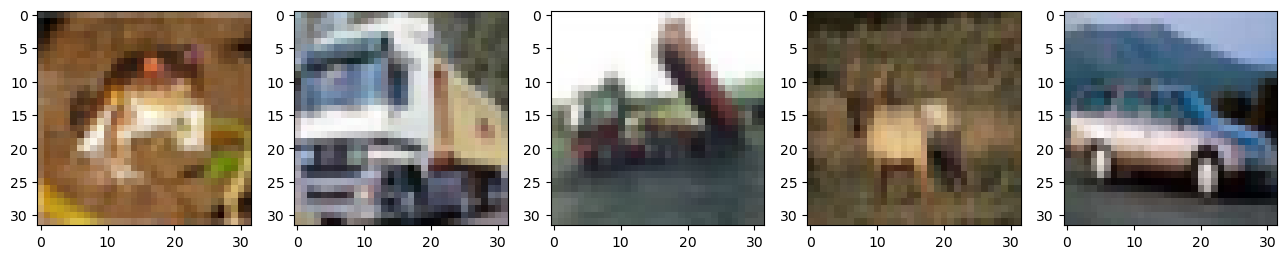

In [14]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In the below code, we perform essential preprocessing steps on the CIFAR-10 dataset before using it for  deep learning tasks.

- We transform the class labels in `y_train` and `y_test` from integer indices to one-hot encoded vectors using the `to_categorical` function. This is a standard technique in classification tasks to represent categorical labels.


- The images in `X_train` and `X_test`, initially shaped as (32, 32, 3), are reshaped into 3072-dimensional vectors (32 * 32 * 3).
    - Initial Image Shape (32, 32, 3):

        - The images in `X_train` and `X_test` are initially represented as 3D arrays.
        - Each image has a shape of `(32, 32, 3)`, where:
            - 32 represents the `height` of the image in pixels.
            - 32 represents the `width` of the image in pixels.
            - 3 represents the number of `color channels` (RGB - Red, Green, Blue).
    - Reshaping to 3072-Dimensional Vectors:

       - The reshaping operation transforms each `3D image` array into a `2D vector` by concatenating the values along each dimension.
       - In this case, the resulting vector is `3072-dimensional (32 * 32 * 3)`, where each value in the vector corresponds to a pixel intensity or color value in the original image.

    - Purpose of reshaping: neural network architectures require the input data to be in a flat vector format rather than a structured grid.

- We convert the data type of the image vectors to `float32` and normalize pixel values to the range [0, 1]. Normalization is a best practice in deep learning to facilitate effective model convergence during training.

In [15]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

## Split Data

Split your data into training (`80%`) and validation (`20%`).

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Train a neural network on the training data for `100 epochs` with a `mini-batch size` of `32 `without doing any hyperameters tuning.

The architecture should be as follows:
- One hidden layer with `50 units`
- One output layer
- The activation of the hidden layer is a `Relu`
- The activation of the output layer is a `Softmax`
- The loss function is a `categorical cross-entropy` function
- The optimizer of this model is `RMSProp`
- The `learning rate` = 0.03

### Create Model

Create the above neural network architecture.

In [17]:
### YOUR CODE STARTS HERE ### (~ fill in the blanks)
model = tf.keras.Sequential([
    Input(shape = X_train.shape[1:]),
    Dense(units=50, activation='relu'),
    Dense(units=10, activation='softmax')
])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.03)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
### YOUR CODE ENDS HERE ###
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                153650    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 154160 (602.19 KB)
Trainable params: 154160 (602.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Expected Output for the model summary**:

<table>
  <tr>
    <td><strong>Model:</strong></td>
    <td colspan="2">sequential</td>
  </tr>
  <tr>
    <td colspan="3"><strong>_______________________________________________________________________________________________________</strong></td>
  </tr>
  <tr>
    <td><strong>Layer (type)</strong></td>
    <td><strong>Output Shape</strong></td>
    <td><strong>Param #</strong></td>
  </tr>
  <tr>
    <td>dense (Dense)</td>
    <td>(None, 50)</td>
    <td>153,650</td>
  </tr>
  <tr>
    <td>dense_1 (Dense)</td>
    <td>(None, 10)</td>
    <td>510</td>
  </tr>
  <tr>
    <td colspan="3"><strong>=================================================================</strong></td>
  </tr>
  <tr>
    <td><strong>Total params</strong></td>
    <td></td>
    <td><strong>154,160</strong></td>
  </tr>
  <tr>
    <td><strong>Trainable params</strong></td>
    <td></td>
    <td><strong>154,160</strong></td>
  </tr>
  <tr>
    <td><strong>Non-trainable params</strong></td>
    <td></td>
    <td><strong>0</strong></td>
  </tr>
  <tr>
      <td colspan="3"><strong>_______________________________________________________________________________________________________</strong></td>
  </tr>
</table>


### Training

Train your model using the `training dataset`, and make sure to include the validation set by passing it to the `validation_data` parameter during the training process

In [18]:
### YOUR CODE STARTS HERE ### (~ fill in the blanks)
history = model.fit(X_train,y_train ,
                    batch_size=32, epochs=100,
                    validation_data=(X_val,y_val))
### YOUR CODE ENDS HERE ###

Epoch 1/100


1250/1250 [==============================] - 10s 6ms/step - loss: 2.7687 - accuracy: 0.0989 - val_loss: 2.3093 - val_accuracy: 0.0992
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3067 - accuracy: 0.1010 - val_loss: 2.3044 - val_accuracy: 0.1002
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3067 - accuracy: 0.0988 - val_loss: 2.3103 - val_accuracy: 0.1002
Epoch 4/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3063 - accuracy: 0.1019 - val_loss: 2.3068 - val_accuracy: 0.0992
Epoch 5/100
1250/1250 [==============================] - 8s 7ms/step - loss: 2.3065 - accuracy: 0.1027 - val_loss: 2.3044 - val_accuracy: 0.1031
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3062 - accuracy: 0.0992 - val_loss: 2.3061 - val_accuracy: 0.1031
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3065 - accuracy: 0.0992 - val_loss: 2.3047 - val

### Learning Curve

Plot your learning curve (i.e., training and validation loss versus number of epochs). What do you observe from the curve? Does your model suffer from high bias/variance? Explain.

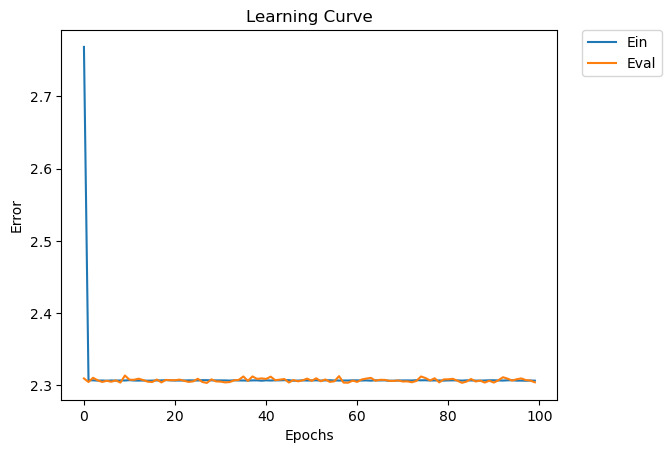

In [19]:
Ein = history.history['loss']
Eval = history.history['val_loss']
plt.plot(Ein,label='Ein')
plt.plot(Eval,label='Eval')
plt.title('Learning Curve')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Does your model exhibit signs of overfitting, underfitting, both, or neither when analyzing the learning curve? Provide a detailed explanation to support your assessment.
###### <span style='color:green'> YOUR EXPLANATION STARTS HERE </span>

In [ ]:
#Both errors Ein and Eval decrease and remain close to each other throughout the training process. 
#Let's check for overfitting:
#There is no large gap between Ein and Eval, and the Ein and Eval curves are close to each other.
#If our model suffers from overfittting, we then should observe that Ein curve is lower than Eval curve, 
#which is not the case here.
#Let's check for underfitting:
#If our model suffers from underfitting, we should observe that both errors Ein and Eval remain high but it's not the case here.

#So, our model doesn't suffer from overfitting nor underfitting. 
#This means that our model is learning and generalizing well.

### Random Search

The code below defines a custom hypermodel class, `MyHyperModel`, using the Keras Tuner (`keras_tuner`). The hypermodel is designed for hyperparameter tuning using techniques such as Bayesian optimization.

In [20]:
!pip install keras_tuner

In [21]:
import keras_tuner as kt
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()

        layers_tuner = hp.Int('dens_layer', 1, 5)
        for l in range(layers_tuner):

            dense_tuner = hp.Int('units', 50, 256)
            model.add(Dense(units=dense_tuner, activation='relu'))

            dropout_tuner = hp.Float('dropout_rate', 0, 0.5)
            model.add(Dropout(dropout_tuner))

        model.add(Dense(units=10, activation='softmax'))
        # Define a learning rate decay
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=hp.Float('initial_learning_rate', 1e-4, 1e-2, sampling='log'),
            decay_steps=hp.Int('decay_steps', 100, 10000),
            decay_rate=hp.Float('decay_rate',  1e-4, 1e-2),
            staircase=True)
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)


        model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [16, 32,64,96,128,256]),
            **kwargs,
        )

In [22]:
tuner = kt.RandomSearch(
    MyHyperModel(),
    objective="accuracy",
    max_trials=10,
    directory="my_dir",
    project_name="tune_hypermodel"
)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

Reloading Tuner from my_dir\tune_hypermodel\tuner0.json


In [23]:
print(tuner.search_space_summary())

Search space summary
Default search space size: 9
dens_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 256, 'step': 1, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
learning_rate_decay (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 96, 128, 256], 'ordered': True}
initial_learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
decay_steps (Int)
{'default': None, 'conditions': [], 'min_value':

### Hyperparameters Tuning

To optimize the performance of the neural network architecture described above, a hyperparameter tuning process will be performed using random search. The tuning will be conducted on the validation set, taking into consideration insights gained from the learning curve analysis.


1. **Learning Rates:** (`['learning_rate']`) Search for optimal learning rates to enhance model convergence.
2. **Dropout Rate:** (`['dropout_rate']`) Optimize the dropout rate for better regularization.
3. **Number of Hidden Units:** (`['units']`) Tune the number of hidden units in each layer for improved representation.
4. **Mini-Batch Size:** (`['batch_size']`)Investigate the impact of different mini-batch sizes on training efficiency.
5. **Learning Rate Decay:** (`['learning_rate_decay']`) Explore suitable learning rate decay values to fine-tune optimization.
6. **Number of Layers:** (`['dens_layer']`) Experiment with the number of hidden layers to find an optimal network depth.



In [24]:
# searching for the best parameter using random search
tuner.search(X_train, y_train, epochs=100,validation_data=(X_val, y_val), callbacks=[stop_early])

In [25]:
# reporting the best parameters
params = tuner.get_best_hyperparameters()[0]
print("The best model has the following configurations:")
print("{} hidden layers\n{} units each hidden layer\ndropout rate: {:.5f}\nlearning rate:\
      {:.5f}\nlearning rate decay: {:.5f}\ndecay steps: {}\nbatch size: {}".format(
    vars(params)['values']['dens_layer'],
    vars(params)['values']['units'],
    vars(params)['values']['dropout_rate'],
    vars(params)['values']['initial_learning_rate'],
    vars(params)['values']['decay_rate'],
    vars(params)['values']['decay_steps'],
    vars(params)['values']['batch_size'],
))

The best model has the following configurations:
2 hidden layers
221 units each hidden layer
dropout rate: 0.17341
learning rate:      0.00075
learning rate decay: 0.00150
decay steps: 3875
batch size: 128


**Expected output for the best parameters**
<table>
  <tr>
    <td><strong>Hidden Layers</strong></td>
    <td>3</td>
  </tr>
  <tr>
    <td><strong>Units per Hidden Layer</strong></td>
    <td>155</td>
  </tr>
  <tr>
    <td><strong>Dropout Rate</strong></td>
    <td>0.06859</td>
  </tr>
  <tr>
    <td><strong>Learning Rate</strong></td>
    <td>0.00059</td>
  </tr>
  <tr>
    <td><strong>Learning Rate Decay</strong></td>
    <td>0.00015</td>
  </tr>
  <tr>
    <td><strong>Batch Size</strong></td>
    <td>16</td>
  </tr>
  <tr>
    <td colspan="2"><em>Note: Your values may vary based on training and optimization.</em></td>
  </tr>
</table>


### Test your Best Model

Finally, once you have tuned your hyperparameters and selected your best model, now test it on the test dataset, and report the F-measure and accuracy.  

After successfully tuning the hyperparameters and selecting the best model based on the validation set, the final step is to assess the model's generalization performance on the test dataset. This evaluation provides an unbiased measure of the model's effectiveness on previously unseen data.

1. **Use your best parameters for the Best Model:**
   - Reconstruct your model using the optimal parameters that were previously identified as yielding the highest performance on the validation set, considering metrics such as accuracy and F-measure.

2. **Testing on the Test Dataset:**
   - Evaluate the best model using the test dataset, which the model has not encountered during training or validation.

3. **Reporting:**
   - Report the F-measure and accuracy achieved by the model on the test dataset.


In [26]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [27]:
# training the best tuned model
# input the best parameters reported before

### YOUR CODE STARTS HERE ###  (~ Fill in the blanks)
tuned_model = tf.keras.Sequential([
    Input(shape = X_train.shape[1:]),
    Dense(units=221, activation='relu'),
    Dense(units=221, activation='relu'),
    Dense(units=221, activation='relu'),
    Dropout(0.17341),
    Dense(units=10, activation='softmax')
])

# input the best learning rate and decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00075,
    decay_steps= 3875,
    decay_rate= 0.00150,
    staircase=True)
opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
tuned_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m])

### YOUR CODE ENDS HERE ###



# report the accuracy and f-measure using the test set as validation data
history_tuned = tuned_model.fit(X_train, y_train,
                    batch_size=128, epochs=100,
                    validation_data=(X_test, y_test), callbacks=[stop_early])



Epoch 1/100
313/313 [==============================] - 12s 28ms/step - loss: 2.0463 - accuracy: 0.2541 - f1_m: 0.0582 - val_loss: 1.8371 - val_accuracy: 0.3318 - val_f1_m: 0.1663
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 1.8276 - accuracy: 0.3395 - f1_m: 0.1586 - val_loss: 1.7429 - val_accuracy: 0.3634 - val_f1_m: 0.1998
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 1.7402 - accuracy: 0.3765 - f1_m: 0.2139 - val_loss: 1.8041 - val_accuracy: 0.3547 - val_f1_m: 0.1946
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 1.6790 - accuracy: 0.3991 - f1_m: 0.2529 - val_loss: 1.7199 - val_accuracy: 0.3926 - val_f1_m: 0.2232
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 1.6280 - accuracy: 0.4177 - f1_m: 0.2838 - val_loss: 1.5892 - val_accuracy: 0.4323 - val_f1_m: 0.3167
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 1.5846 - accuracy: 0.4320 - f1_m:

##  <span style="color:red">Bonus Exercise: </span>  SVM

In this exercise, you will train a linear SVM classifier on `training-svm.txt` data. You will learn how to tune and find the best value of the soft-margin threshold `C` using an exhaustive `grid search` with 5-fold cross-validation, and report the cross-validation accuracy and F-measure and the number of support vectors for the selected model.

The training set provided consists of `65 columns`, where the first `64 columns` are the `features` and the `last column` is the `class label`. Your goal is to build a multi-class SVM classifier that can predict the label of a given instance using its feature values. To achieve this goal, you need to perform the following tasks.


## Import Libraries

You need to run the below cell to import the necessary libraries, including `pandas` for data manipulation, `SVC` (Support Vector Classification) from scikit-learn for building a support vector machine model, and `GridSearchCV` for hyperparameter tuning.

- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) Class: The `SVC` class (Support Vector Classification) is used for classification tasks. It supports various kernel functions, including `linear`, `polynomial`, and `radial` basis function.
- [Hyperparameter Tuning with GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):
GridSearchCV is used for hyperparameter tuning inorder to find the optimal values of parameters such as the regularization parameter `C` and kernel parameters.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Load Data

In the below code, you should read a CSV file named `training-svm.txt` using a pandas DataFrame. The `header=None` argument indicates that there is no header row in the txt file.

You need to retrieve the feature matrix `x` and target vector `y` from the DataFrame `data`. `x` contains all columns excluding the last one which is assigned to `y` (assumed to be the target variable).

In [29]:
###### YOUR CODE STARTS HERE ##### (~ approx 3 line of code)
data= pd.read_csv('training-svm.txt', header=None, encoding='ISO-8859-1')
x = data.iloc[:, :-1]
y = data.iloc[:,-1]
###### YOUR CODE ENDS HERE #####
print (f"Number of features shape: {(x.shape)}")
print (f"Number of labels shape: {(y.shape)}")

Number of features shape: (3823, 64)
Number of labels shape: (3823,)


**Expected Output for x shape and y shape**:
<table style="width:15%">
  <tr>
    <td>**x**</td>
    <td> (3823, 64) </td>
  </tr>
  
  <tr>
    <td>**y**</td>
    <td> (3823,) </td>
  </tr>
  
</table>


In [30]:
assert x.shape == (3823, 64)
assert y.shape == (3823,)

print("\nYour values are correct! Continue with the rest of your code.")


Your values are correct! Continue with the rest of your code.


## SVM: Linear Kernel

**Step 1.** In the below code, we will show you to apply linear SVM and how to define a dictionary `parameters` with hyperparameter values to be tested during grid search. In this case, it explores different values of the `regularization parameter` C (1, 10, and 100).

`GridSearchCV` is used for hyperparameter tuning. It performs a search over the specified parameter grid (parameters) using `5-fold cross-validation`. It evaluates the model based on both `micro F1-score` and `accuracy`, selecting the best model based on accuracy for refitting.

In [31]:
parameters = {'C':[1, 10, 100]}
svc = SVC(kernel="linear")
clf = GridSearchCV(svc, parameters, scoring = ['f1_micro','accuracy'],return_train_score=True, cv=5, refit='accuracy')
clf.fit(x, y)
print(clf.best_estimator_)
print(clf.best_score_)

SVC(C=1, kernel='linear')
0.9780292919960305


**Expected Output for best estimator and best score**:
<table style="width:40%">
  <tr>
    <td>**best estimator**</td>
    <td> SVC(C=1, kernel='linear') </td>
  </tr>
  
  <tr>
    <td>**best score**</td>
    <td> 0.9780292919960305 </td>
  </tr>
  
</table>


Below, you should print the result of running a grid search using GridSearchCV, Let's break down the key components:

- `mean_fit_time` and `std_fit_time`: These represent the mean and standard deviation of the fit times for each combination of hyperparameters.

- `mean_score_time` and `std_score_time`: These represent the mean and standard deviation of the score computation times for each combination of hyperparameters.

- `param_C` and `params`: These show the hyperparameter values that were tested (in this case, different values of C for an SVM).

- `split_test_f1_micro` and `split_train_f1_micro`: These show the micro F1 scores on the test and training sets for each split of the cross-validation. Micro F1 is a metric that considers the overall performance across all classes.

- `mean_test_f1_micro` and `mean_train_f1_micro`: These show the mean micro F1 scores across all splits for the test and training sets.

- `std_test_f1_micro` and `std_train_f1_micro`: These show the standard deviation of the micro F1 scores across all splits for the test and training sets.

- `split_test_accuracy` and `split_train_accuracy`: These show the accuracy scores on the test and training sets for each split of the cross-validation.

- `mean_test_accuracy` and `mean_train_accuracy`: These show the mean accuracy scores across all splits for the test and training sets.

- `std_test_accuracy` and `std_train_accuracy`: These show the standard deviation of the accuracy scores across all splits for the test and training sets.

- `rank_test_f1_micro` and `rank_test_accuracy`: These show the ranking of different hyperparameter combinations based on their performance in terms of micro F1 and accuracy, respectively.

In [32]:
clf.cv_results_

{'mean_fit_time': array([0.14885316, 0.11561689, 0.12536421]),
 'std_fit_time': array([0.05506133, 0.00765339, 0.00930367]),
 'mean_score_time': array([0.03997641, 0.03437247, 0.04062319]),
 'std_score_time': array([0.01080176, 0.00625019, 0.00765473]),
 'param_C': masked_array(data=[1, 10, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 10}, {'C': 100}],
 'split0_test_f1_micro': array([0.98169935, 0.98169935, 0.98169935]),
 'split1_test_f1_micro': array([0.97908497, 0.97908497, 0.97908497]),
 'split2_test_f1_micro': array([0.96732026, 0.96732026, 0.96732026]),
 'split3_test_f1_micro': array([0.98167539, 0.98167539, 0.98167539]),
 'split4_test_f1_micro': array([0.98036649, 0.98036649, 0.98036649]),
 'mean_test_f1_micro': array([0.97802929, 0.97802929, 0.97802929]),
 'std_test_f1_micro': array([0.00544102, 0.00544102, 0.00544102]),
 'rank_test_f1_micro': array([1, 1, 1]),
 'split0_train_f1_micro': array([1.,

**Step 2.** We report below the `mean_test_f1_micro` and the `mean_test_accuracy`

In [33]:
print("F-measure: ", clf.cv_results_['mean_test_f1_micro'][0])
print("Accuracy : ", clf.cv_results_['mean_test_accuracy'][0])

F-measure:  0.9780292919960305
Accuracy :  0.9780292919960305


**Step 3.** We retrain the SVM model using the best `C=1` parameter and report the number of support vectors

In [34]:
svc = SVC(kernel="linear",C=1)
svc.fit(x,y)
print("Support Vectors= ",len(svc.support_vectors_))

Support Vectors=  561


## SVM : Polynomial Kernel

In this part, you need to repeat **Step 1, Step 2** and **Step 3** using an `SVM` classifier with a `polynomial` kernel on your training data. You should set the values of the different hyperparameters using an exhaustive grid search with 5-fold cross-validation. Report your cross-validation accuracy and F-measure and the number of support vectors for the selected model.

**Step 1.** In the below code, apply a `polynomial` SVM and define a dictionary `parameters` with hyperparameter values to be tested during grid search.

In [35]:
###### YOUR CODE STARTS HERE ##### (~ approx 4 line of code)
parameters = {'C': [1,10,100]}
svc = SVC(kernel = "poly")
clf = GridSearchCV(svc, parameters, scoring = ['f1_micro','accuracy'],return_train_score=True, cv=5, refit='accuracy')
clf.fit(x,y) #fit the gridsearchcv to the data
###### YOUR CODE ENDS HERE #####
print(clf.best_estimator_)
print(clf.best_score_)

SVC(C=1, kernel='poly')
0.9895370085206858


**Step 2.** Report below the `mean_test_f1_micro` and the `mean_test_accuracy`

In [36]:
###### YOUR CODE STARTS HERE ##### (~ approx 2 line of code)
print("F-measure: ", clf.cv_results_['mean_test_f1_micro'][0])
print("Accuracy : ", clf.cv_results_['mean_test_accuracy'][0])
###### YOUR CODE ENDS HERE #####

F-measure:  0.9895370085206858
Accuracy :  0.9895370085206858


**Step 3.** Retrain the SVM model using the best parameters and report the number of support vectors

In [37]:
###### YOUR CODE STARTS HERE ##### (~ approx 2 line of code)
svc = SVC(kernel="poly", C=1)
svc.fit(x,y)
###### YOUR CODE ENDS HERE #####
print("Support Vectors= ",len(svc.support_vectors_))

Support Vectors=  760


## SVM: RBF Kernel

In this part, you need to repeat **Step 1, Step 2** and **Step 3** using an `SVM` classifier with a `RBF` kernel on your training data. You should set the values of the different hyperparameters using an exhaustive grid search with 5-fold cross-validation. Report your cross-validation accuracy and F-measure and the number of support vectors for the selected model.

**Step 1.** In the below code, apply a `polynomial` SVM and define a dictionary `parameters` with hyperparameter values to be tested during grid search.

In [38]:
###### YOUR CODE STARTS HERE ##### (~ approx 4 line of code)
parameters = {'C': [1,10,100]}
svc = SVC(kernel="rbf")
clf = GridSearchCV(svc, parameters, scoring = ['f1_micro','accuracy'],return_train_score=True, cv=5, refit='accuracy')
clf.fit(x,y)

###### YOUR CODE ENDS HERE #####
print(clf.best_estimator_)
print(clf.best_score_)

SVC(C=10)
0.9903216644423913


**Step 2.** Report below the `mean_test_f1_micro` and the `mean_test_accuracy`

In [39]:
###### YOUR CODE STARTS HERE ##### (~ approx 2 line of code)
print("F-measure: ", clf.cv_results_['mean_test_f1_micro'][0])
print("Accuracy : ", clf.cv_results_['mean_test_accuracy'][0])
###### YOUR CODE ENDS HERE #####

F-measure:  0.9879687232659207
Accuracy :  0.9879687232659207


**Step 3.** Retrain the SVM model using the best parameters and report the number of support vectors

In [40]:
###### YOUR CODE STARTS HERE ##### (~ approx 2 line of code)
svc = SVC(kernel="rbf", C=10)
svc.fit(x,y)
###### YOUR CODE ENDS HERE #####
print("Support Vectors= ",len(svc.support_vectors_))

Support Vectors=  909
